In [81]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
%matplotlib inline
np.random.seed(0)

In [82]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
# from PIL import Image
# x = X_train[0]
# y = y_train[0]
# imgx = Image.fromarray(x)
# imgx.show()

# print(y)
# imgy = Image.fromarray(y)
# imgy.show()




(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [83]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images in not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (28, 28)), "The dimension of images is not 28 * 28"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images is not 28 * 28"

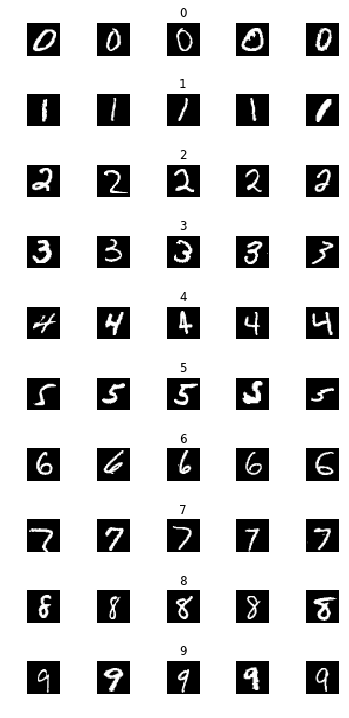

In [84]:
num_of_samples = []
cols = 5
num_of_classes = 10
fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(num_of_classes):
    for j in range(cols):
        x_selected = X_train[y_train == i]
        axs[i][j].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap("gray"))
        axs[i][j].axis("off")        
        if j == 2 :
            axs[i][j].set_title(i)
    num_of_samples.append(len(x_selected))
    
    
# fig, axs = plt.subplots(nrows=num_of_classes, ncols = cols, figsize=(5, 8))
# fig.tight_layout()
# for i in range(cols):
#     for j in range(num_of_classes):
#         x_selected = X_train[y_train == j]
#         axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
#         axs[j][i].axis("off")
#         if i == 2:
#             axs[j][i].set_title(str(j))
#             num_of_samples.append(len(x_selected))
plt.show()

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


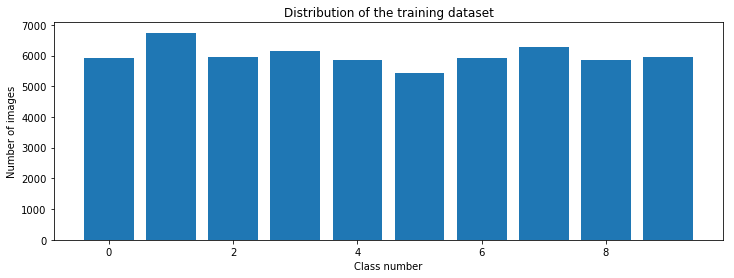

In [85]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [86]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

num_pixels = 784

X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)




(60000, 784)


In [87]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [88]:
model = create_model()
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
h = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.6336 - acc: 0.8048 - val_loss: 0.3175 - val_acc: 0.9063
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3767 - acc: 0.8923 - val_loss: 0.2794 - val_acc: 0.9225
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3364 - acc: 0.9010 - val_loss: 0.2755 - val_acc: 0.9200
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3243 - acc: 0.9047 - val_loss: 0.2756 - val_acc: 0.9160
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3089 - acc: 0.9087 - val_loss: 0.2787 - val_acc: 0.9163
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2992 - acc: 0.9121 - val_loss: 0.2585 - val_acc: 0.9205
Epoch 7/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2903 - acc: 0.9131 - val_loss: 0.2649 - val_acc:

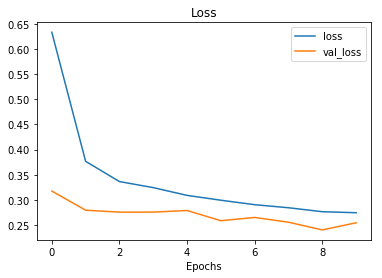

In [90]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

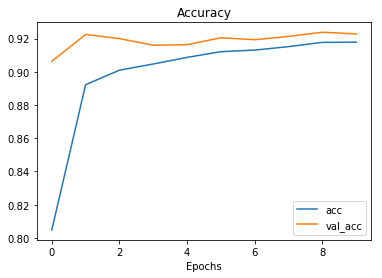

In [91]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(['acc', 'val_acc'])
plt.show()

In [92]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score :: ', score[0])
print('Test accuracy:: ', score[1])

<class 'list'>
Test score ::  0.3025012398466468
Test accuracy::  0.9105


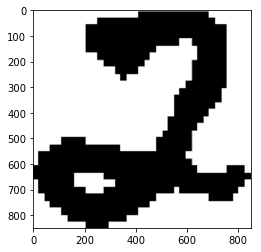

In [93]:
import requests
from PIL import Image
url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

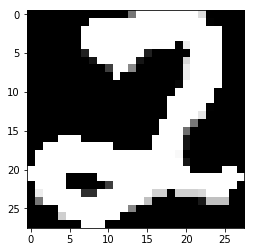

In [94]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [95]:
image = image/255
image = image.reshape(1, 784)
#print(image)

In [96]:
prediction = model.predict_classes(image)
print("Predicted Digit ::: ", prediction)

Predicted Digit :::  [6]
